<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/Dimar/%22%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BE%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_Feature_Selection_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
#pip install pandas openpyxl
!cp drive/MyDrive/Стажировка_РАН/Сводная_База_МЭП_DIMAR.xlsx ./
!cp drive/MyDrive/Стажировка_РАН/Обраб_Сводная_База_МЭП_DIMAR.xlsx ./


### Отбор параметров - Feature selection

In [94]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [123]:
# Задаем имена файлов и листов

file_path = 'Обраб_Сводная_База_МЭП_DIMAR.xlsx'
sheet_Base = 'База'
sheet_DicPar = 'Словарь_параметров'
NameData_row = 'Т'

# Читаем данные с листов
data = pd.read_excel(file_path, sheet_name=sheet_Base, index_col=0)
df_dic = pd.read_excel(file_path, sheet_name=sheet_DicPar)

#!!! Преозразуем инфляцию в зоны положительных чисел 
data['Y2'] = (data['Y2'] + 100) / 100

data.head()

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X9,...,Z30,Z32,Z50,Z60,Z62,Z63,Z73,Z88,Z98,Z99
Т,,,,,,,,,,,,,,,,,,,,,
1999-01-01,300.333333,1.0838,96.5,454,1697.0,2566,283.3,28.5,14.1,101.700,...,108.4,96.92,84.00,277.7,67.0,177.3,1.825465,28.7,300.333333,290.23
1999-02-01,300.333333,1.0413,97.2,472,1832.0,2418,258.8,31.8,16.3,112.014,...,104.1,103.24,85.15,252.1,70.0,179.9,1.895853,29.5,300.333333,290.23
1999-03-01,300.333333,1.0279,97.7,501,2317.0,2532,299.2,36.5,20.5,140.244,...,102.8,107.58,122.00,291.4,93.5,181.2,2.366505,32.4,300.333333,290.23
1999-04-01,367.333333,1.0303,99.1,448,3066.0,2764,283.8,36.9,19.6,159.918,...,103.0,113.06,181.50,277.1,110.8,181.0,3.233398,32.7,367.333333,290.23
1999-05-01,367.333333,1.0222,100.1,414,3607.0,3087,289.1,41.4,22.0,124.644,...,102.2,116.71,221.00,282.1,128.8,179.8,2.198301,32.8,367.333333,290.23


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 1999-01-01 to 2022-12-01
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      288 non-null    float64
 1   Y2      288 non-null    float64
 2   X1      288 non-null    float64
 3   X2      288 non-null    int64  
 4   X3      288 non-null    float64
 5   X4      288 non-null    int64  
 6   X5      288 non-null    float64
 7   X6      288 non-null    float64
 8   X7      288 non-null    float64
 9   X9      288 non-null    float64
 10  X10     288 non-null    float64
 11  X11     288 non-null    float64
 12  X12     288 non-null    float64
 13  X13     288 non-null    float64
 14  X14     288 non-null    float64
 15  X15     288 non-null    float64
 16  X16     288 non-null    int64  
 17  X17     288 non-null    int64  
 18  X18     288 non-null    float64
 19  X19     288 non-null    int64  
 20  X20     288 non-null    int64  
 21  X21     288 non-null

In [124]:
#===============================================================================
# Создаем словарь с описанием столбцов
columns_with_description = df_dic.set_index('код параметра')['текстовое описание'].to_dict()
#===============================================================================
# Выполняем анализ содержания оставшейся базы
#summary = data.describe().T
summary = data.describe(percentiles=[]).T
# Добавляем текстовые описания столбцов
summary['текстовое описание'] = summary.index.map(columns_with_description)
# Выводим статистическую информацию
display(summary)


,count,mean,std,min,50%,max,текстовое описание
Y1,288.0,4886.054826,3480.368761,300.333333,4378.966590,12927.666667,"Объем ВВП, млрд рублей"
Y2,288.0,1.008515,0.009237,0.994600,1.006300,1.083800,"Инфляция, индекс %"
X1,288.0,102.846632,6.764798,74.300000,102.450000,139.600000,1.3. Индекс производства продукции сельского х...
X2,288.0,920.486111,344.170993,395.000000,931.500000,1817.000000,1.4.1 Производство продуктов животноводства в ...
X3,288.0,2632.049093,622.913432,1565.000000,2559.500000,4111.000000,1.4.2 Производство продуктов животноводства в ...
X4,288.0,3354.378472,422.611764,2299.000000,3403.000000,4175.000000,1.4.3 Производство продуктов животноводства в ...
X5,288.0,403.138889,55.000338,258.800000,411.300000,500.300000,"1.5. Грузооборот транспорта, включая коммерчес..."
X6,288.0,884.707639,757.922458,28.500000,741.600000,3749.600000,"1.6.Инвестиции в основной капитал, млрд рублей"
X7,288.0,420.440904,332.391295,14.100000,375.800000,1827.900000,1.7. Объем работ_Строительства_в фактических ц...
X9,288.0,1250.174859,889.669298,101.700000,1126.026000,4313.500270,"1.9.1 экспорт товаров – всего, млрд руб."


In [145]:
# Удаляем дублирующие параметры
data.drop('Z32', axis=1, inplace=True)
data.drop('Z98', axis=1, inplace=True)
data.drop('Z99', axis=1, inplace=True)

Корреляционный анализ данных.

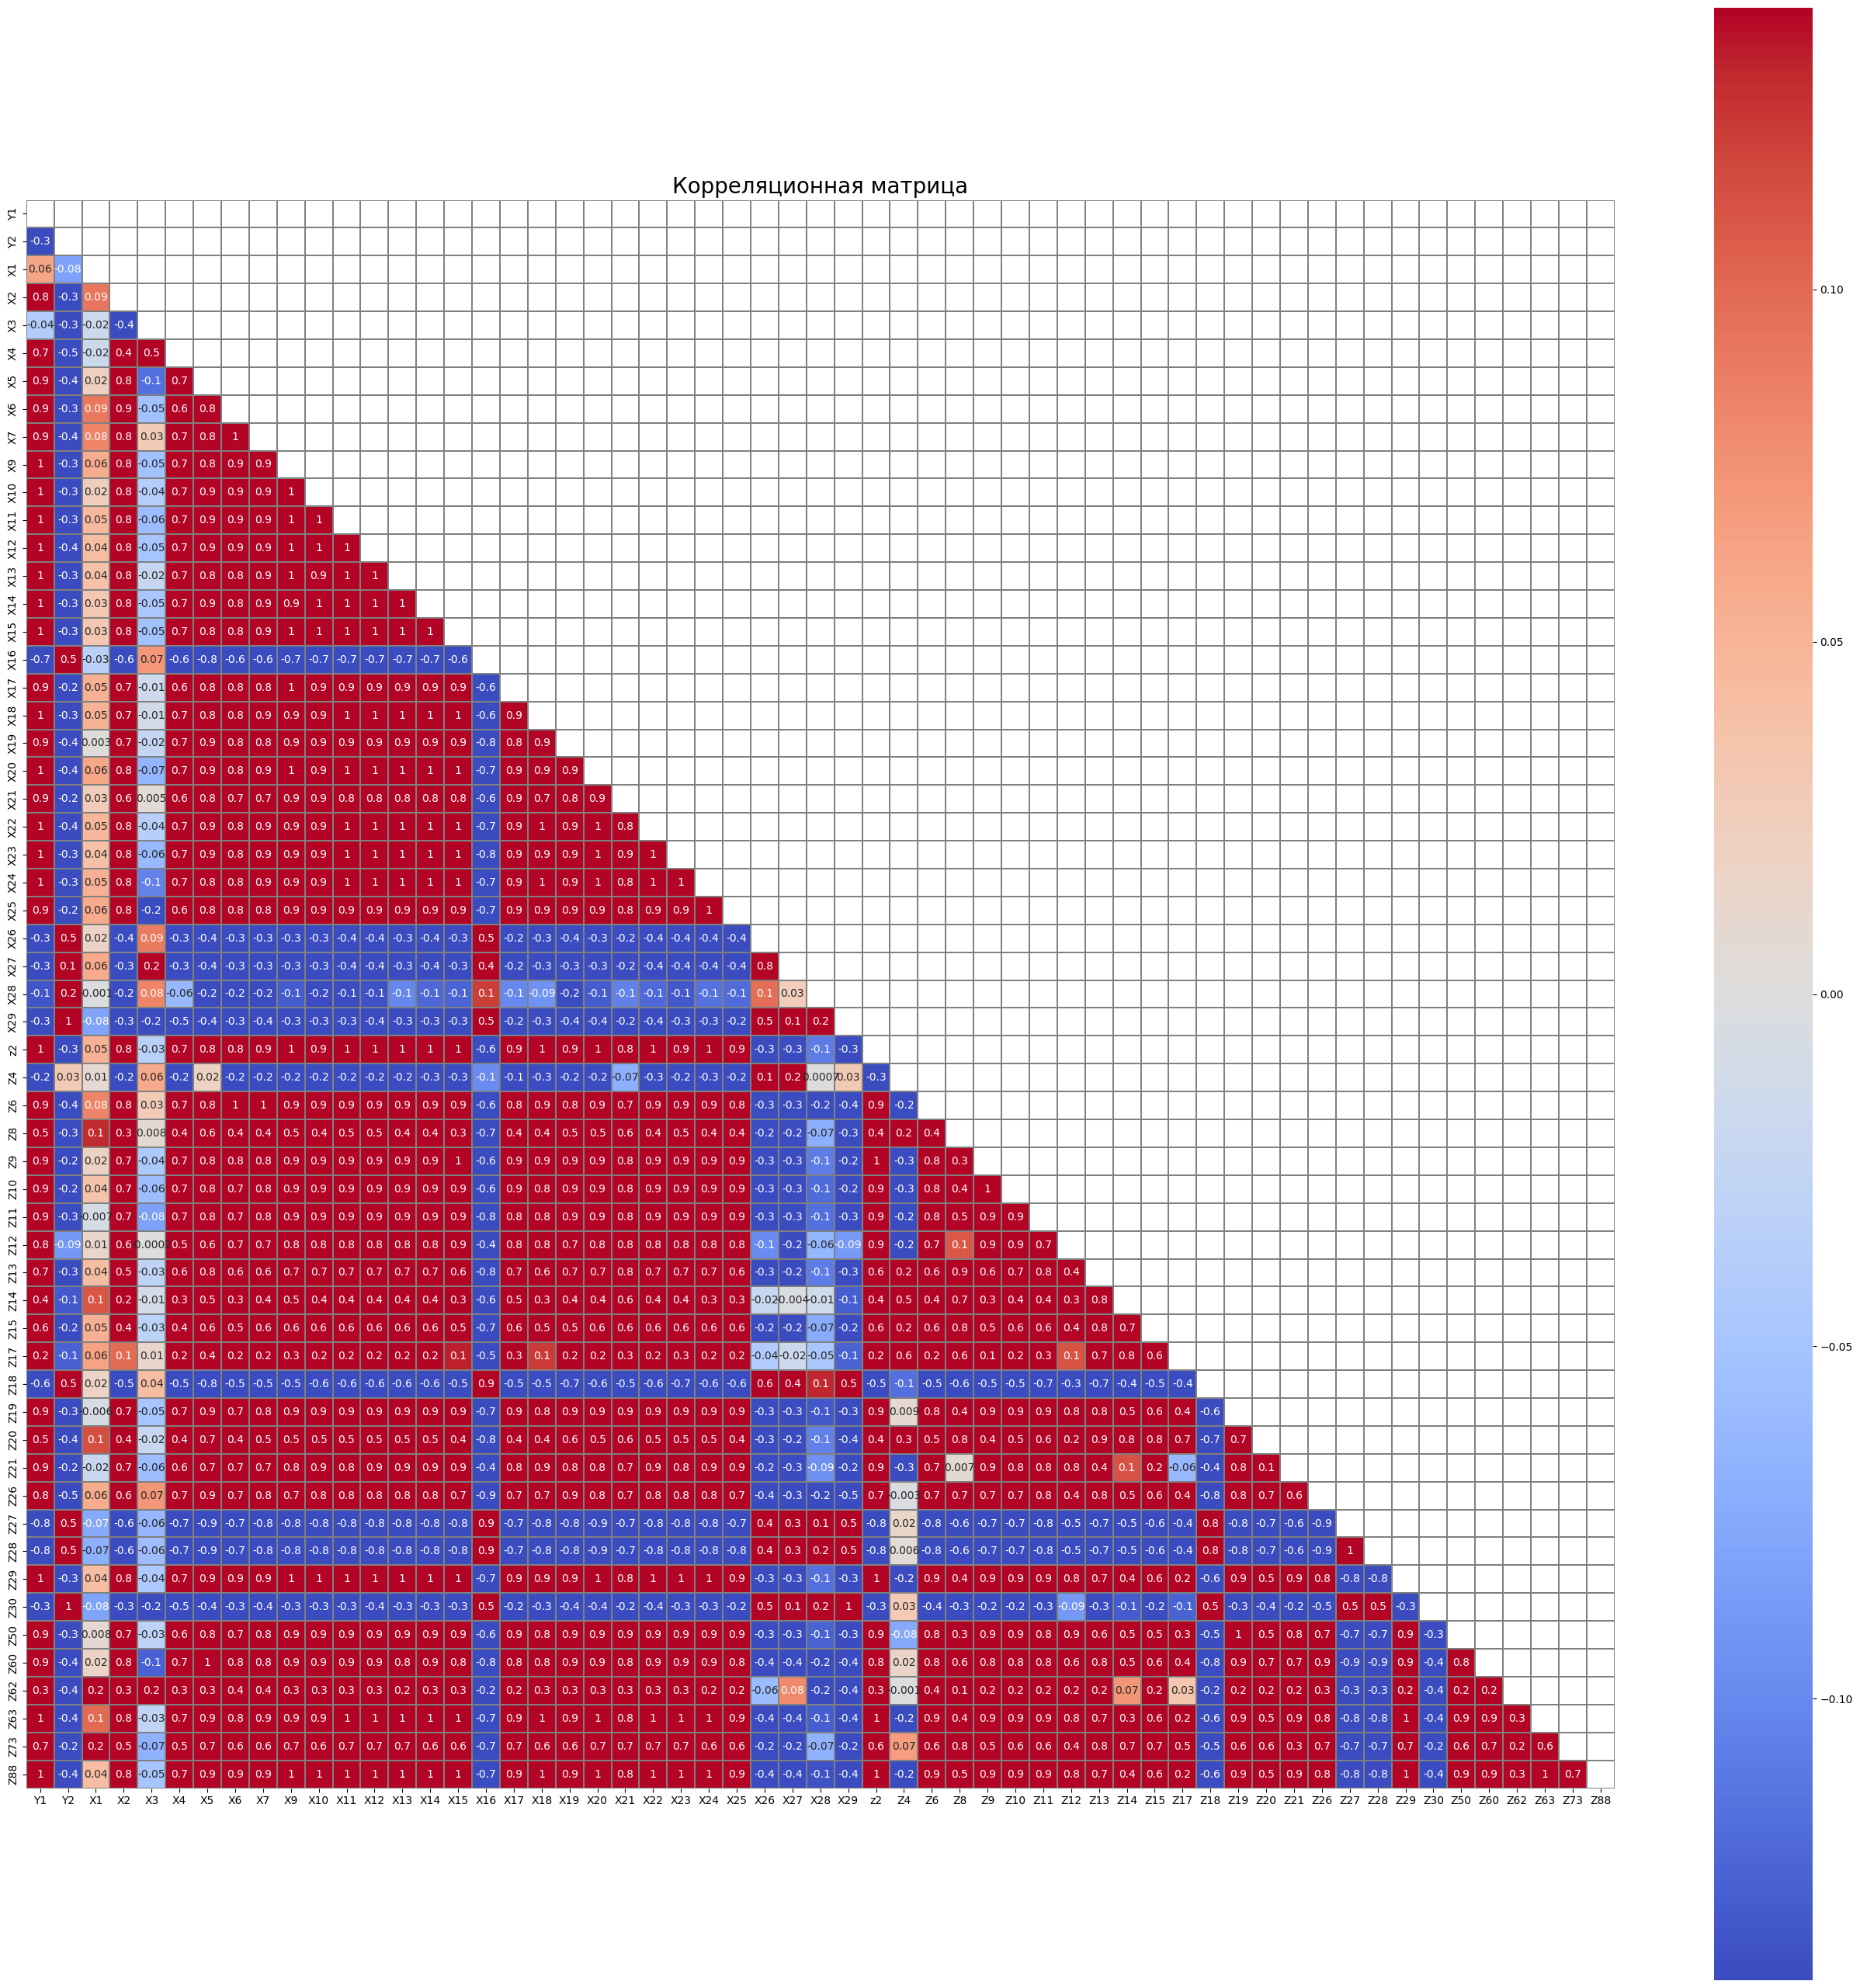

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# установка первого столбца в качестве индекса
#df_base.set_index(df_base.columns[0], inplace=True)

# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(data.iloc[:, :].corr())
plt.figure(figsize=(33,33))
sb.heatmap(data.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.01, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()


In [163]:
# Для ВВП 
X1 = data.iloc[:,1:]  # Входящие  данные для ВВП
y1 = data.iloc[:,0]    # Целевой столбец 1  ВВП

# Для инфляции
X2 = data.iloc[:, [i for i in range(data.shape[1]) if i != 1]]  # Входящие данные для ВВП, исключая второй столбец
y2 = data.iloc[:,1]    # Целевой столбец 2 Инфляция


1. Для ВВП

#### Feature Importance

[8.29417981e-05 1.13161987e-04 8.18720610e-04 9.35885927e-05
 3.42485364e-05 1.48564038e-04 3.35118375e-03 1.25201250e-03
 3.12516681e-02 1.88455406e-02 9.97441182e-02 8.10836190e-02
 4.19238794e-02 5.95858324e-02 8.54290587e-02 3.13097480e-03
 2.06887497e-03 2.59361641e-02 2.38421899e-03 4.72017870e-02
 8.59662333e-04 5.07877849e-02 6.23741281e-03 2.61306468e-02
 1.84650553e-04 8.27918623e-05 9.30700865e-05 4.43739844e-05
 7.22103183e-05 1.37638573e-01 6.26463455e-04 1.88157062e-03
 1.06532719e-03 2.55379166e-02 1.65441782e-02 9.24100042e-05
 1.04090500e-02 2.94558979e-04 7.74407685e-04 4.89308025e-03
 6.66904145e-04 9.41606498e-04 8.71552940e-04 4.04625048e-04
 1.31821328e-04 1.75695563e-04 7.48171553e-04 8.58119969e-04
 4.66183552e-02 6.24864469e-05 9.22304403e-03 2.59015233e-04
 2.64834849e-04 4.60190227e-02 6.25657052e-04 1.03398790e-01]


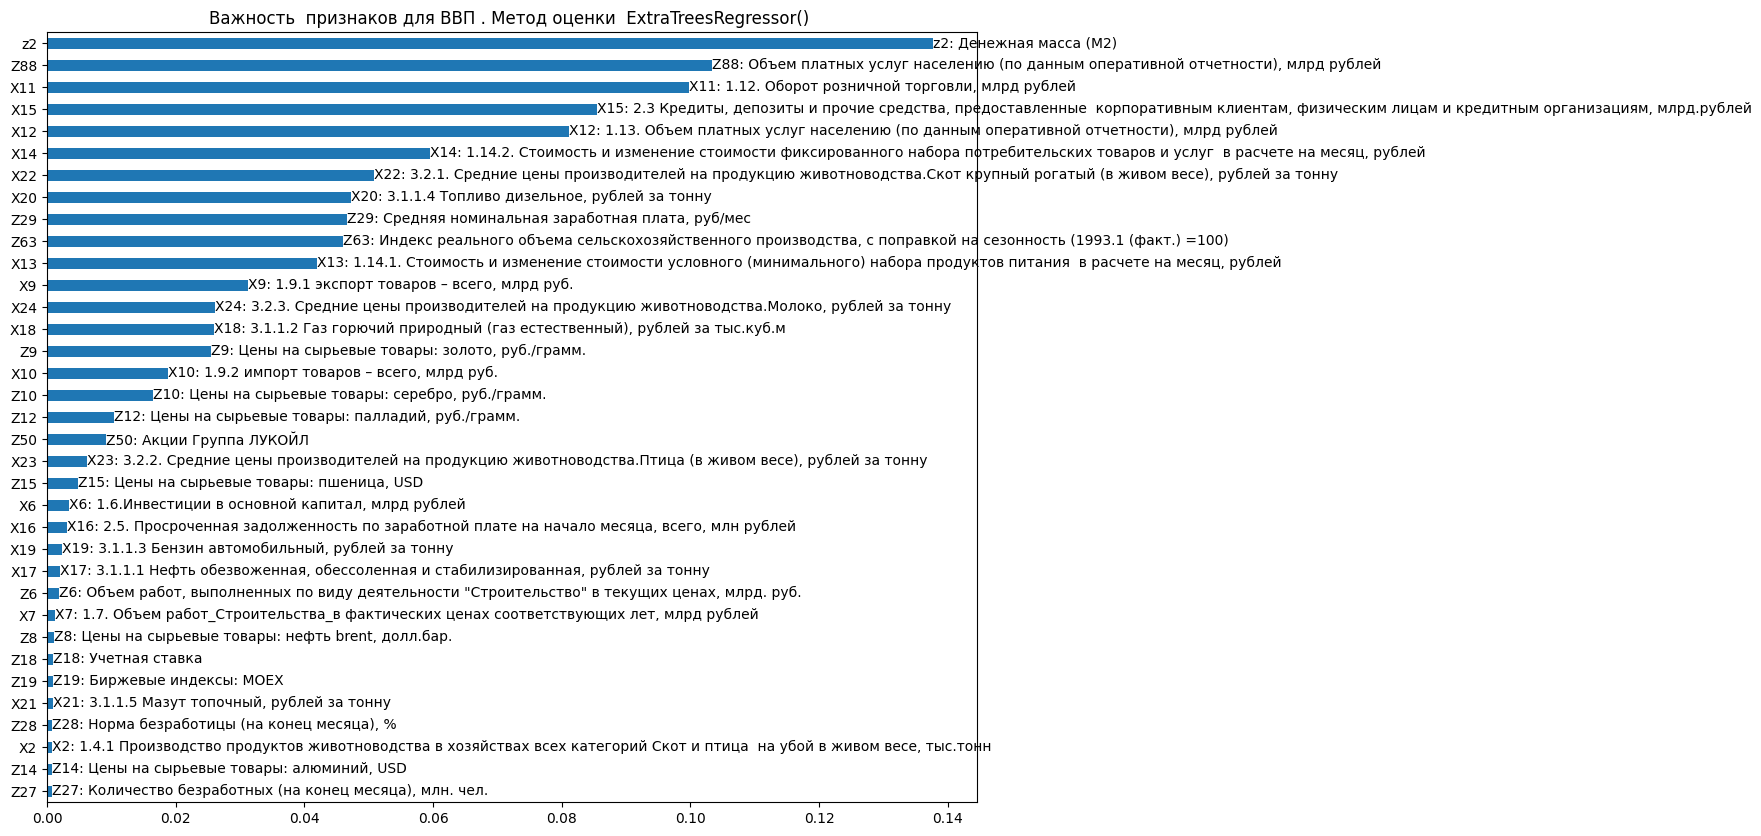

In [157]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X1, y1)
print(model.feature_importances_)

# Дополнительно: визуализация важности признаков
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Увеличение размера графика
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(35).plot(kind='barh')

# Развернуть график и добавить текст описания параметра
plt.gca().invert_yaxis()
plt.title('Важность  признаков для ВВП . Метод оценки  ExtraTreesRegressor() ')  # Добавление названия диаграммы

# Добавление текста описания параметра из словаря по ключу кода параметра
for i, (importance, col) in enumerate(zip(feat_importances.nlargest(35), feat_importances.nlargest(35).index)):
    description = columns_with_description.get(col, "Описание не найдено")
    plt.text(importance, i, f"{col}: {description}", va='center')


plt.show()








[1.08436068e-05 4.75444497e-04 4.09877095e-04 1.20504887e-04
 4.30442880e-04 4.54646319e-05 8.14231844e-04 1.78081339e-03
 5.06510628e-05 7.72864214e-05 8.25701641e-05 2.24234444e-05
 4.66033130e-04 2.42457279e-05 1.14038402e-03 3.07522370e-05
 8.34944811e-05 8.54393683e-04 4.87531668e-04 4.11122522e-05
 7.56225369e-05 2.06445827e-04 3.95508283e-05 1.09869523e-04
 4.78090375e-05 2.84419218e-04 1.26076941e-04 9.33168053e-04
 4.94638711e-01 3.61056697e-04 6.19097912e-05 3.82835304e-05
 5.23034828e-04 3.68521226e-05 8.86696748e-05 1.85749190e-03
 4.65631313e-05 8.47129044e-05 7.40073017e-05 7.70343860e-05
 1.89926415e-04 8.66178809e-05 2.84977661e-05 1.57429929e-03
 2.25215471e-03 6.59132743e-03 2.37136839e-03 1.67312820e-03
 2.93178093e-05 4.74400247e-01 4.09361850e-05 2.85345031e-03
 5.55485207e-04 4.59913317e-05 7.21966693e-05 7.52650608e-05]


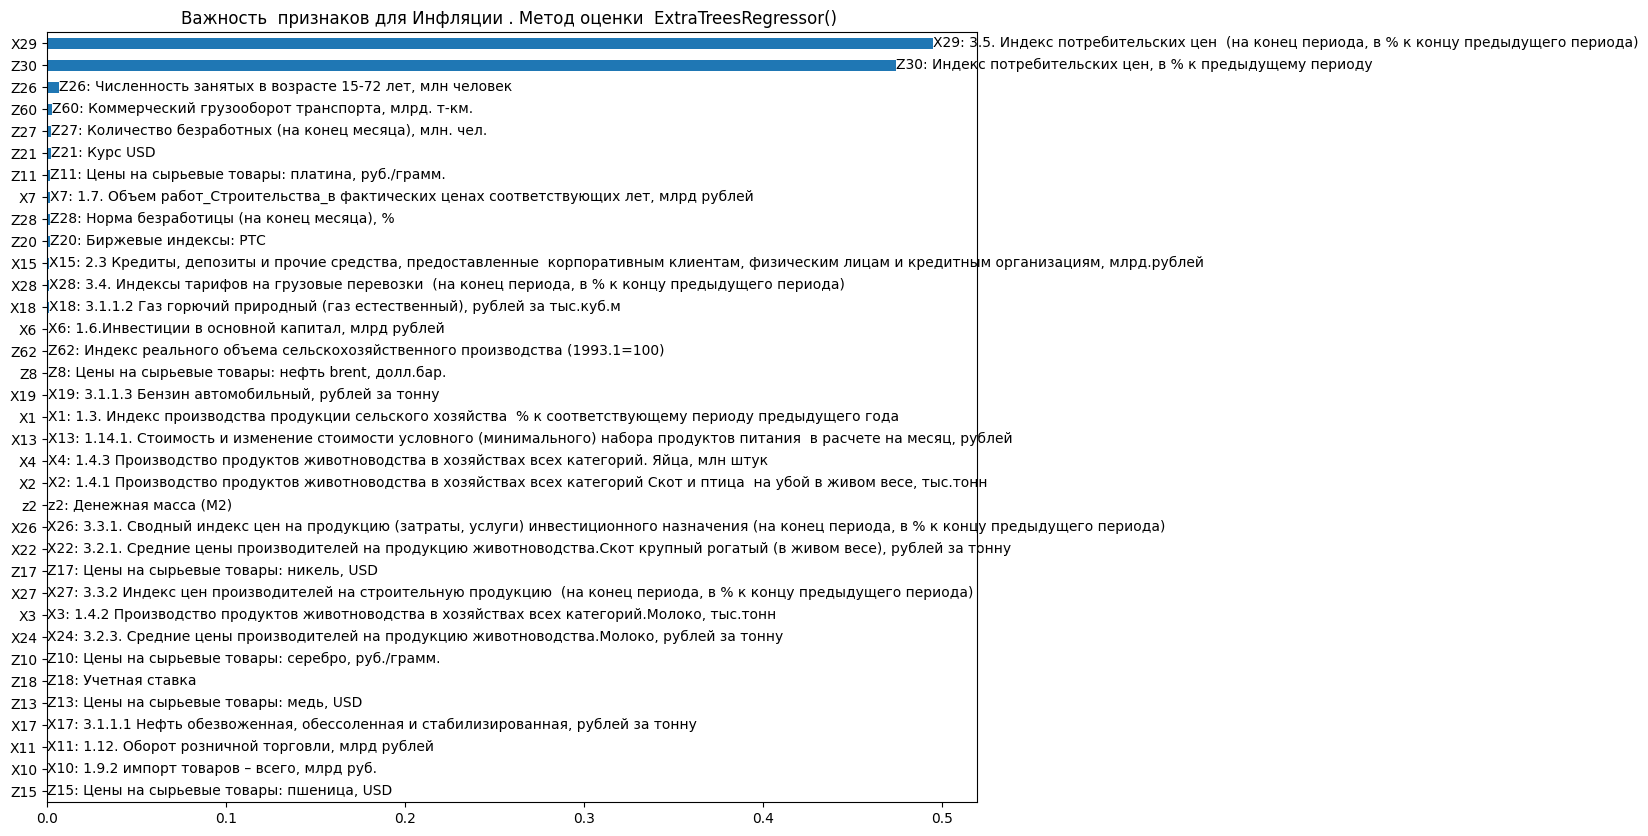

[0.00648674 0.01490482 0.00706173 0.03252429 0.03764999 0.00821305
 0.02690291 0.02094512 0.01202527 0.01120315 0.0094989  0.00268815
 0.01052387 0.00824314 0.00648215 0.03258949 0.00747386 0.00826577
 0.01155707 0.00459032 0.01392704 0.01591054 0.01224137 0.01218792
 0.01551162 0.0546847  0.00454522 0.02366447 0.00549998 0.01045847
 0.02028656 0.00752573 0.03385314 0.03262222 0.03489595 0.03258964
 0.00737097 0.02478765 0.0096175  0.01064878 0.03554276 0.00588672
 0.00802522 0.03826811 0.07658456 0.03777376 0.02917645 0.00679271
 0.00716515 0.00937766 0.05250351 0.01420347 0.00456261 0.01147803]


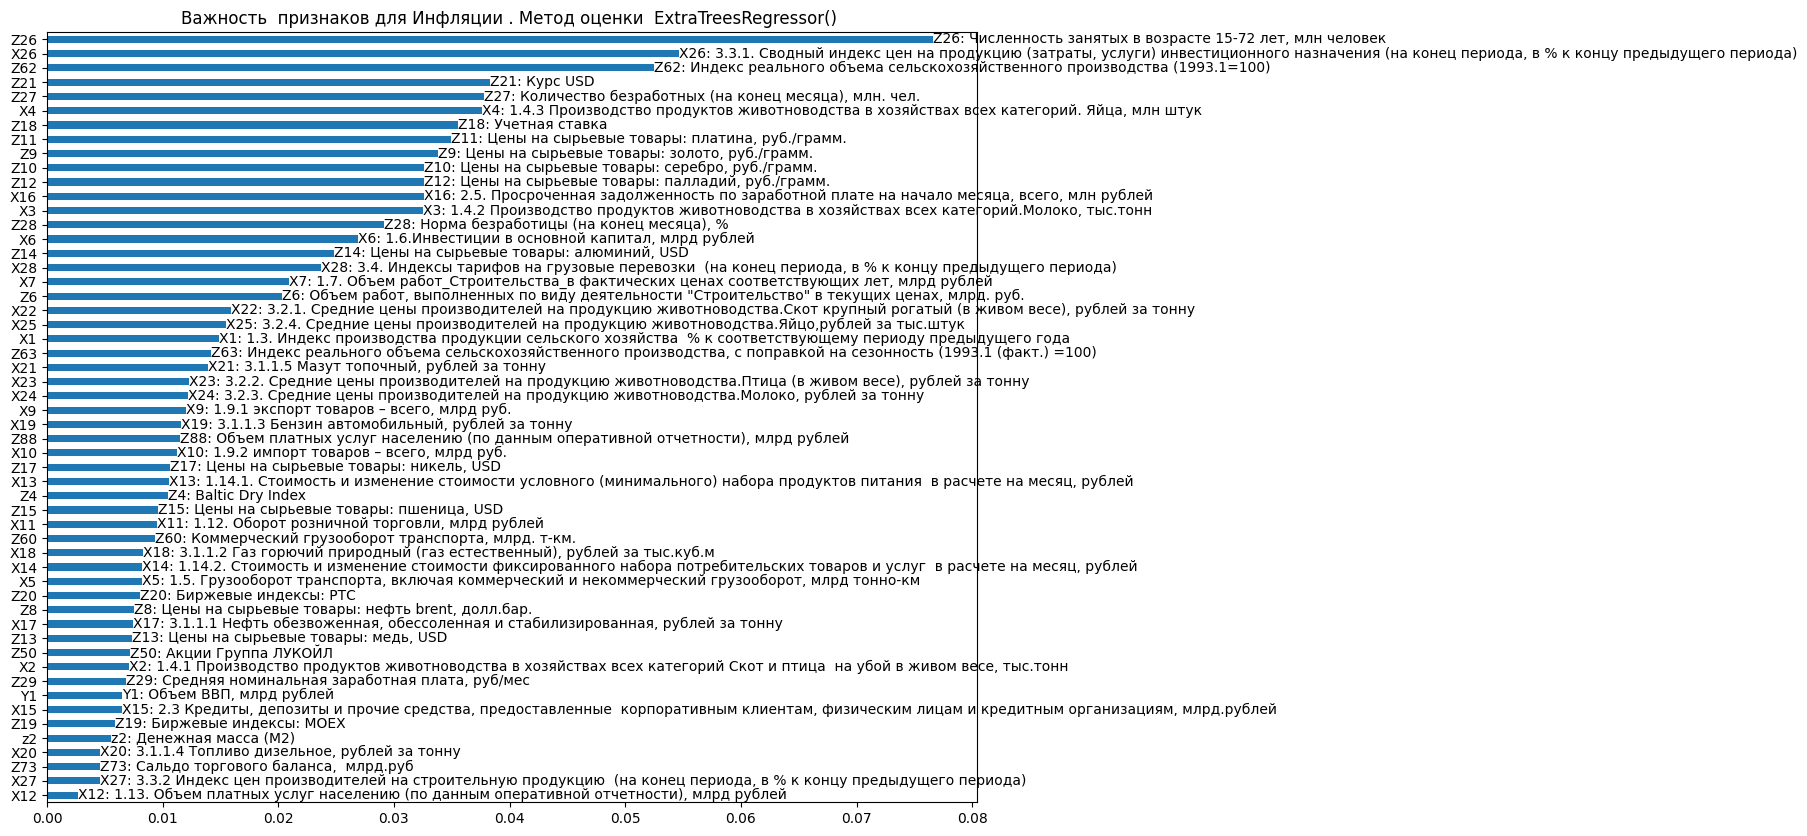

In [164]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X2, y2)
print(model.feature_importances_)

# Дополнительно: визуализация важности признаков
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Увеличение размера графика
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(35).plot(kind='barh')

# Развернуть график и добавить текст описания параметра
plt.gca().invert_yaxis()
plt.title('Важность  признаков для Инфляции . Метод оценки  ExtraTreesRegressor() ')  # Добавление названия диаграммы

# Добавление текста описания параметра из словаря по ключу кода параметра
for i, (importance, col) in enumerate(zip(feat_importances.nlargest(35), feat_importances.nlargest(35).index)):
    description = columns_with_description.get(col, "Описание не найдено")
    plt.text(importance, i, f"{col}: {description}", va='center')


plt.show()

# Удалим индексы цен.
# Удаляем дублирующие параметры
X2.drop('X29', axis=1, inplace=True)
X2.drop('Z30', axis=1, inplace=True)

model = ExtraTreesRegressor()
model.fit(X2, y2)
print(model.feature_importances_)

# Дополнительно: визуализация важности признаков
import matplotlib.pyplot as plt
Nftrs=55
plt.figure(figsize=(12, 10))  # Увеличение размера графика
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(Nftrs).plot(kind='barh')

# Развернуть график и добавить текст описания параметра
plt.gca().invert_yaxis()
plt.title('Важность  признаков для Инфляции . Метод оценки  ExtraTreesRegressor() ')  # Добавление названия диаграммы

# Добавление текста описания параметра из словаря по ключу кода параметра
for i, (importance, col) in enumerate(zip(feat_importances.nlargest(Nftrs), feat_importances.nlargest(Nftrs).index)):
    description = columns_with_description.get(col, "Описание не найдено")
    plt.text(importance, i, f"{col}: {description}", va='center')


plt.show()








#### Select From Model

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [ ]:
clf = LassoCV(cv=5)

In [ ]:
sfm = SelectFromModel(clf) #threshold=0.4
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
n_features = sfm.transform(X).shape[1]

In [ ]:
n_features

4

In [ ]:
sfm.transform(X)

array([[ 842.,   20.,  756., 2549.],
       [1021.,  905., 1988., 2631.],
       [ 563., 1263., 1716., 2603.],
       ...,
       [1911.,  868., 1632., 3057.],
       [1512.,  336.,  670.,  869.],
       [ 510.,  483.,  754., 3919.]])

In [ ]:
sfm.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [ ]:
pd.series(sfm.estimator_,feature_importances_,.ravel()).hist()